# Lead Scoring Case Study


Steps followed to build the model:
1. [Importing Libraries and Data](#1)
2. [Data Understanding and Inspection](#2)
3. [Data Cleaning](#3)
4. [Data Analysis (EDA)](#4)
5. [Data Preparation](#5)
6. [Test-Train Split](#6)
7. [Feature Scaling](#7)
8. [Feature Selection](#8)
9. [Model Building](#9)
10. [Model Evaluation](#10)
11. [Predictions on Test Set](#11)
12. [Conclusion](#12)

## <p id="1">1. Importing Libraries and Data</p>

In [264]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'
pio.templates.default = "plotly_dark"

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
# from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve


In [265]:
# reading the leads dataset
leads_df = pd.read_csv('Leads.csv')

## <p id="2">2. Data Understanding and Inspection</p>

In [266]:
leads_df.shape

(9240, 37)

In [267]:
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

find unique values in each column in the data frame

In [268]:
# display the info of the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [269]:
# check for columnwise null count
leads_df.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [270]:
#columnwise null values count in terms of percentages sorted in descending order
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

<strong><span style="color:blue">Observation:</span></strong>  There are 13 columns with missing values rate > 15%.
Columns with high missing values rate can be dropped.

In [271]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [272]:
# unique values count in each column
leads_df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

In [273]:
# check duplicate rows
leads_df.duplicated().sum()

0

<strong><span style="color:blue">Observation:</span></strong>  No duplicate columns found in the dataframe

## <p id="3">3. Data Cleaning</p>

#### Handling Missing Values

In [274]:
#columnwise null values count in terms of percentages sorted in descending order
round(100*(leads_df.isna().mean()), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Replacing 'Select' with NaN

Problem statement states that "Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value"

Considering the above statement, we will replace the 'Select' values with NaN.

In [275]:
# find all the column names having value 'Select' in it
def find_cols_with_select_val(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].str.contains('Select').any():
                print(col)                

find_cols_with_select_val(leads_df)

Specialization
How did you hear about X Education
Lead Profile
City


<strong><span style="color:blue">Observation:</span></strong>  There are 4 columns containing 'Select' as a value. We can replace them with NaN as they are not useful for our analysis.

In [276]:
# replace 'Select' with NaN
leads_df = leads_df.replace('Select', np.nan)

In [277]:
find_cols_with_select_val(leads_df)

<strong><span style="color:blue">Observation:</span></strong>  Select values are now replaced with NaN values.

In [278]:
# lets check columnwise null ratio again
round(100*(leads_df.isna().mean()), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Lets consider 40% as the cut off the null values. If the column has more than 40% null values, we will drop the column.

In [279]:
# drop all the columns with 40% or more missing values

leads_df = leads_df.dropna(thresh=0.6*len(leads_df), axis=1)

In [280]:
leads_df.shape

(9240, 30)

<strong><span style="color:blue">Observation:</span></strong>  Number of columns in the dataset are now reduced to 30 from 37.

In [281]:
# columns with categorical data

leads_df_cat = leads_df.select_dtypes(include=['object']).columns
print('Number of Categorical Columns: ', len(leads_df_cat))
print('Categorical Columns: ', leads_df_cat)

Number of Categorical Columns:  25
Categorical Columns:  Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


### Imputing missing values

In [282]:
# City column has 39.71% missing values.
#lets check the value counts and decide what to do with it
leads_df['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

<strong><span style="color:blue">Observation:</span></strong>  Data is not uniformly distributed. Mumbai has the maximum number of leads. Lets drop the city column as it is skewed towards Mumbai.

In [283]:
# drop city column
leads_df.drop('City', axis=1, inplace=True)
leads_df.shape

(9240, 29)

In [284]:
# Specialization column has 36.58% missing values.
# lets check the value counts of the column
leads_df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

<strong><span style="color:blue">Observation:</span></strong>  Data is uniformly distributed. No outliers are present. Lets create a new category called 'Others'

In [285]:
# create a new category "Others" for the variable "Specialization" with all null values
# leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')
leads_df['Specialization'] = leads_df['Specialization'].fillna('Others')

In [286]:
# Tags column has 36.29% missing values.
# lets check the value counts of the column
leads_df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [287]:
#### Tags and Country column is irrelavant for the model. Hence, dropping it.
leads_df.drop(['Tags', 'Country'], axis=1, inplace=True)

In [288]:
# 'What matters most to you in choosing a course' column has 29.32% missing values.
# lets check the value counts of the column
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [289]:
# 'What matters most to you in choosing a course' column data is highly skewed.
# So we are dropping this column.
leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [290]:
# 'What is your current occupation' has 29.11% missing values
# lets check the value counts
leads_df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [291]:
# lets impute the missing values in 'What is your current occupation' with 'Unemployed'
leads_df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [292]:
leads_df['TotalVisits'].value_counts(normalize=True)*100

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64

In [293]:
# Impute TotalVisits with mode
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mode()[0], inplace=True) 

In [294]:
leads_df['Page Views Per Visit'].value_counts(normalize=True)*100

0.00    24.047017
2.00    19.718774
3.00    13.138526
4.00     9.842909
1.00     7.151489
          ...    
3.43     0.010985
2.56     0.010985
6.33     0.010985
1.64     0.010985
2.08     0.010985
Name: Page Views Per Visit, Length: 114, dtype: float64

In [295]:
# Impute Page Views Per Visit with mode value
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0], inplace=True)

In [296]:
leads_df['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [297]:
# Imputing the Lead Source column with the mode value i.e. Google
leads_df['Lead Source'].fillna('Google', inplace=True)

In [298]:
leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [299]:
# Imputing the Last Activity column with the mode value i.e. Email Opened
leads_df['Last Activity'].fillna('Email Opened', inplace=True)

In [300]:
# lets check the unique values in each column
leads_df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

In [301]:
# assign column names with 1 unique value to a list
cols_with_one_unique_val = [col for col in leads_df.columns if leads_df[col].nunique() == 1]
cols_with_one_unique_val

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [302]:
# columns with one unique value doesnt contribute to the model building,
# lets drop them
leads_df.drop(cols_with_one_unique_val, axis=1, inplace=True)

In [303]:
# dropping Prospect ID, Lead Number, Last Notable Activity as they do not contribute to the model
leads_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [304]:
leads_df.shape

(9240, 18)

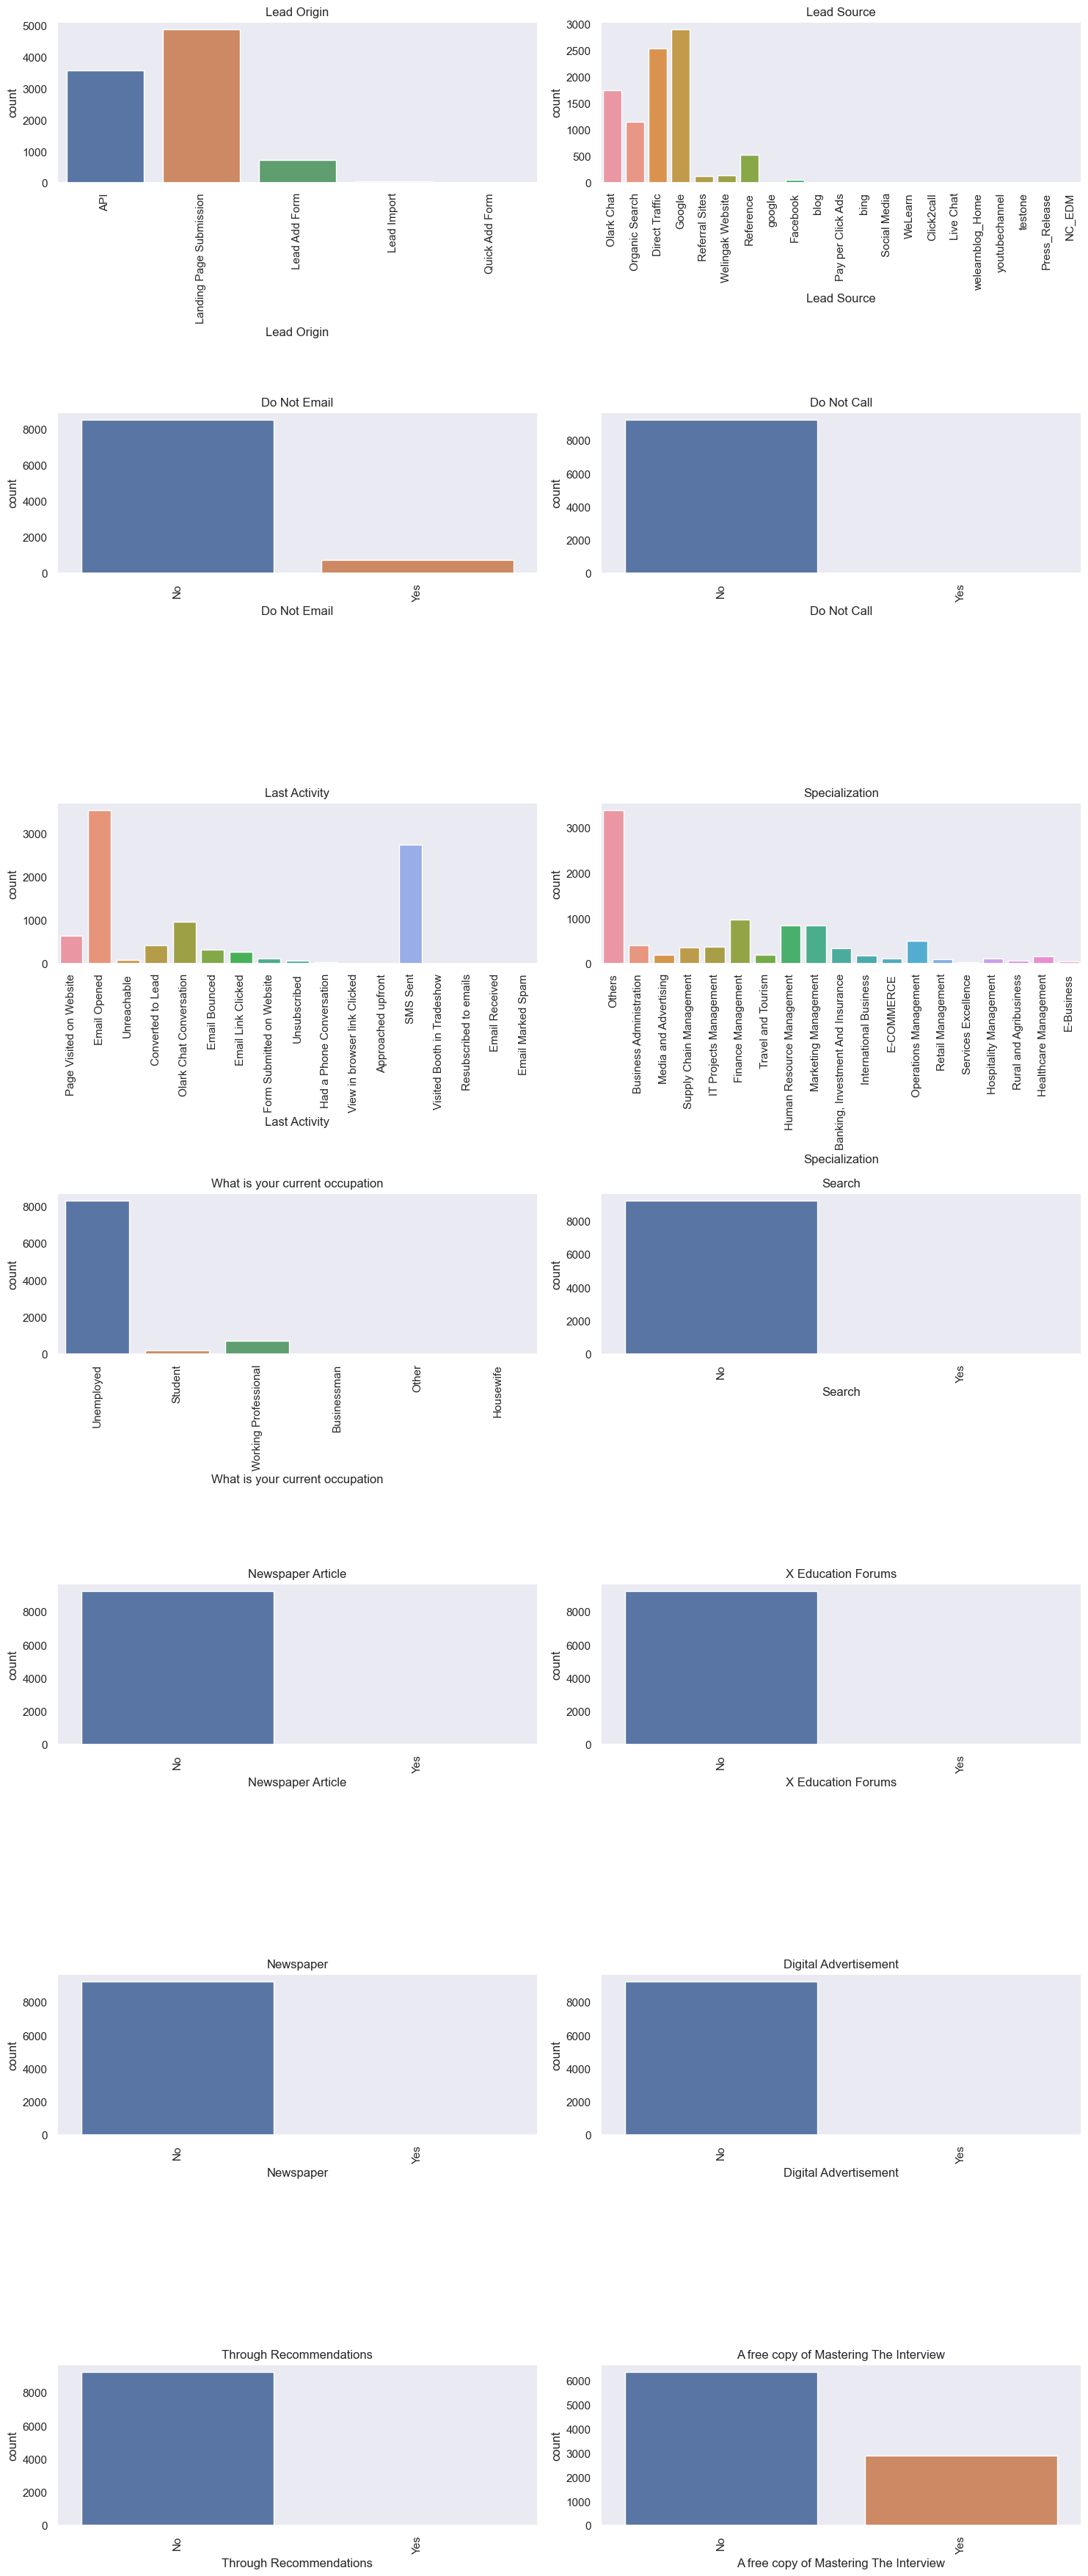

In [305]:
# function to plot count plots for categorical variables
def plot_count_plots(dataframe, cols):
    plt.figure(figsize=(15, 40))  # Adjust the figure size if needed

    for col in cols:
        plt.subplot(8, 2, cols.index(col) + 1)
        sns.countplot(data=dataframe, x=col)
        plt.title(col, fontsize=12)
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

categorical_col = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
plot_count_plots(leads_df, categorical_col)

<strong><span style="color:blue">Observation:</span></strong> 
Following columns are highly skewed
- Through Recommendations
- Newspaper
- Newspaper Article
- Digital Advertisement
- X Education Forums
- Search
- Do not Call

Since these columns are highly skewed, we can drop these columns as they will not add any value to our analysis.


In [306]:

leads_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print(leads_df.shape)

(9240, 11)


In [307]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

#### Outlier Analysis

In [308]:
# numeric columns
numerical_cols = leads_df.select_dtypes(exclude=['category', 'object']).columns.tolist()

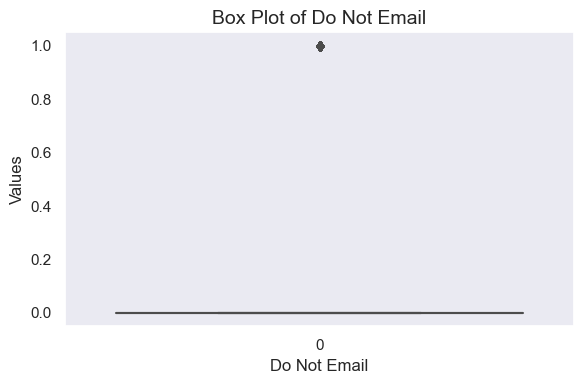

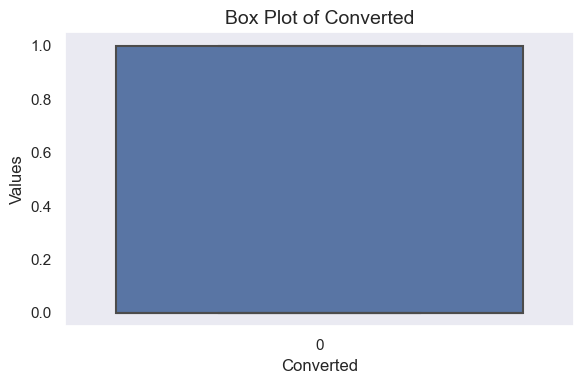

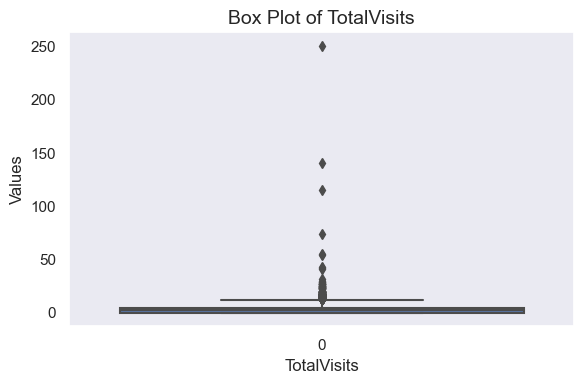

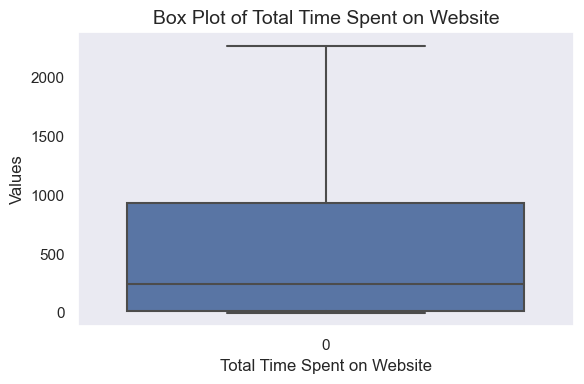

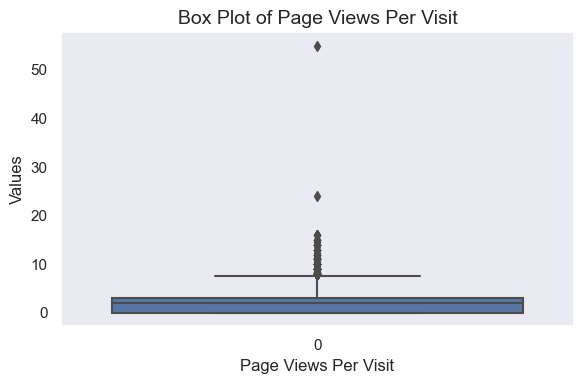

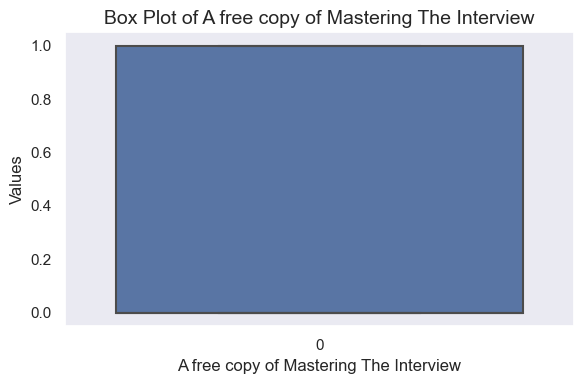

In [309]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed

    sns.boxplot(data=leads_df[col])

    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel('Values')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

#### Outlier Treatment

In [310]:
def perform_outlier_treatment(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])

columns_to_treat = ['TotalVisits', 'Page Views Per Visit']

for col in columns_to_treat:
    perform_outlier_treatment(leads_df, col)

In [311]:
leads_df.shape

(9240, 11)

In [312]:
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.213853                   487.698268   
std        0.270435     0.486714     3.005136                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
10%        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     0.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
95%        1.000000     1.000000    10.000000                  1562.000000   
max        1.000000     1.000000    12.500000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.274987                                0.312554  
std                1.917776                                0.463559  
min                0.000000                                0.000000  
10%                0.000000                                0.000000  
25%                0.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
95%                6.000000                                1.000000  
max                7.500000                                1.000000

In [313]:
leads_df['Lead Source'].value_counts(normalize=True)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [314]:
# Changing google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace("google","Google")

# Group the values of the column 'Lead Source' into a new value 'Others' if the value count is less than 10 in the column 'Lead Source'
category_counts = leads_df['Lead Source'].value_counts()
category_names_less_than_10 = category_counts[category_counts < 10].index.tolist()
print(category_names_less_than_10)
leads_df.loc[leads_df['Lead Source'].isin(category_names_less_than_10), 'Lead Source'] = 'Others'

leads_df['Lead Source'].value_counts(normalize=True)*100

['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'testone', 'NC_EDM']


Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [315]:
# Group the values of the variable 'Last Activity' into a new category called 'Others' if the value count is less than 100

category_counts = leads_df['Last Activity'].value_counts()
category_names_less_than_100 = category_counts[category_counts < 100].index.tolist()

leads_df.loc[leads_df['Last Activity'].isin(category_names_less_than_100), 'Last Activity'] = 'Others'

leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [316]:
print(leads_df.select_dtypes(include=['category', 'object']).columns.tolist())
print(leads_df.select_dtypes(exclude=['category', 'object']).columns.tolist())

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']
['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']


In [317]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

## <p id="4">4. Data Analysis (EDA)</p>

#### Univariate Analysis

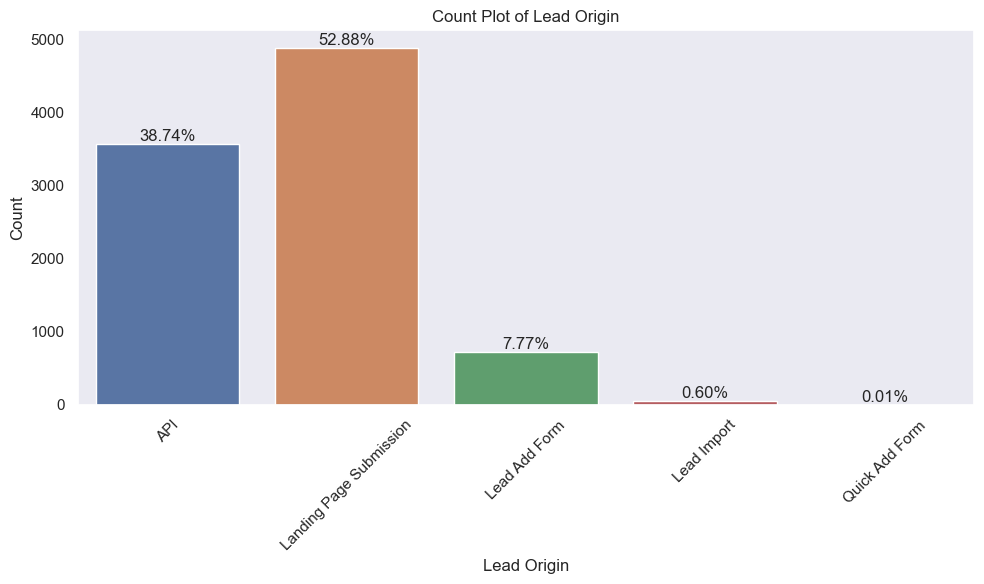

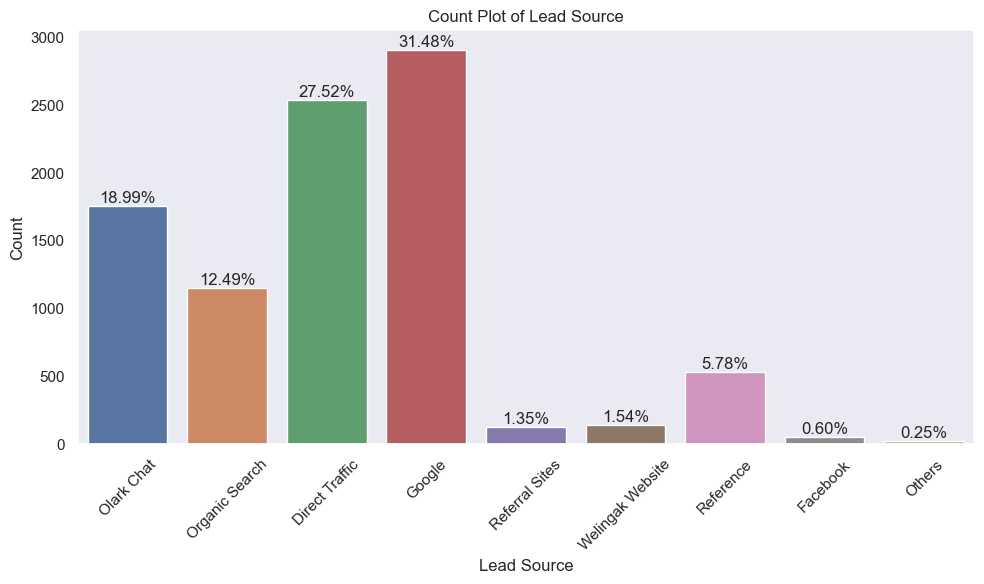

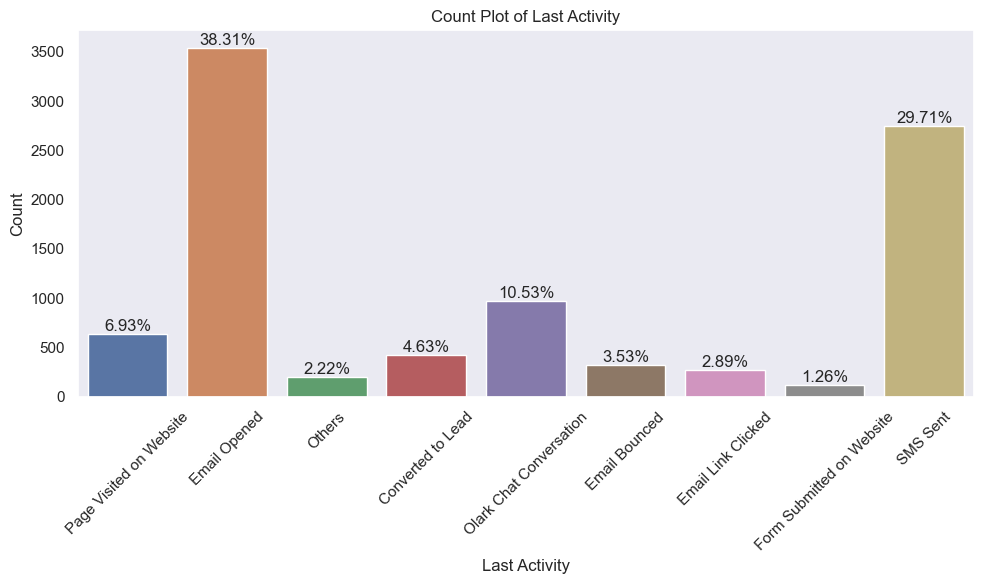

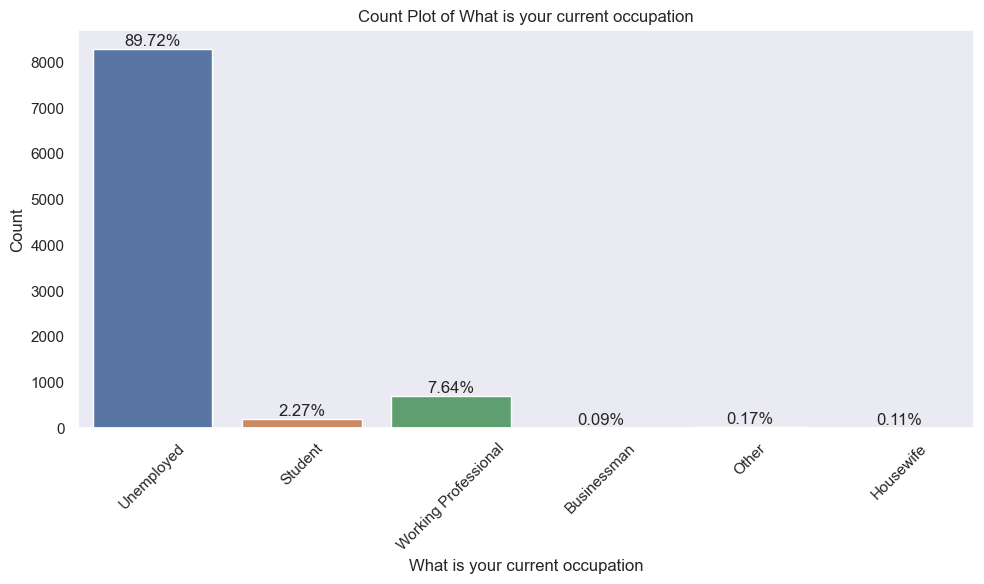

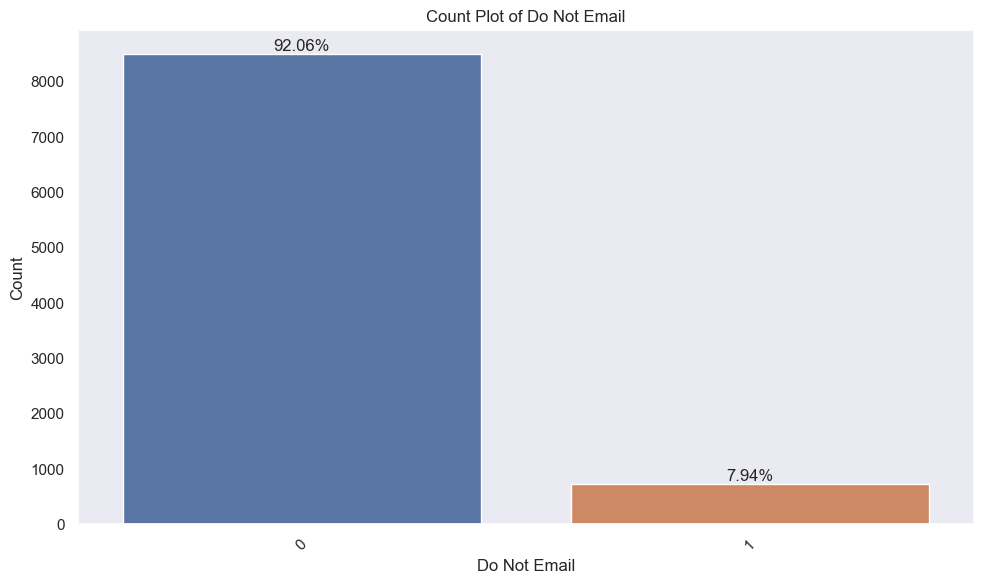

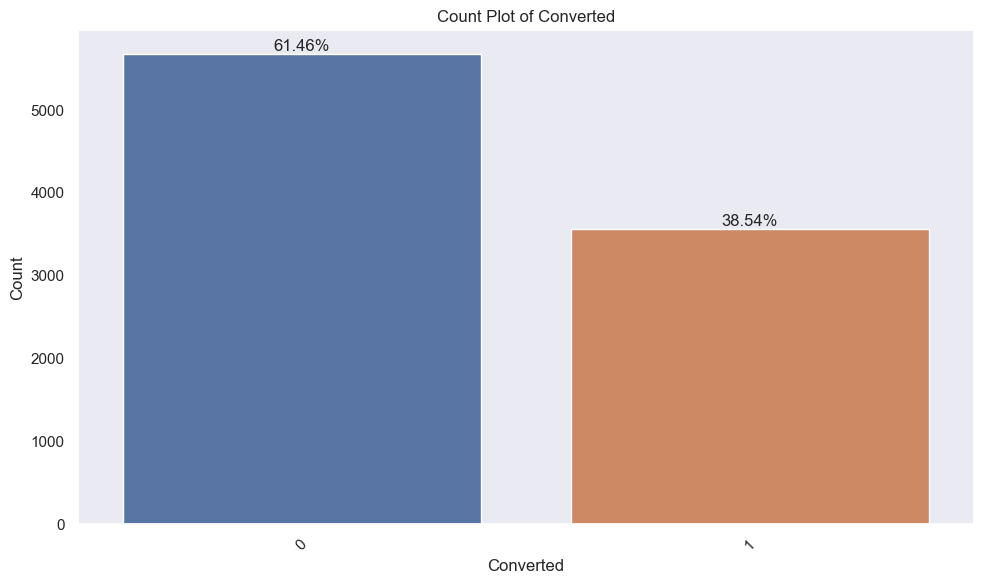

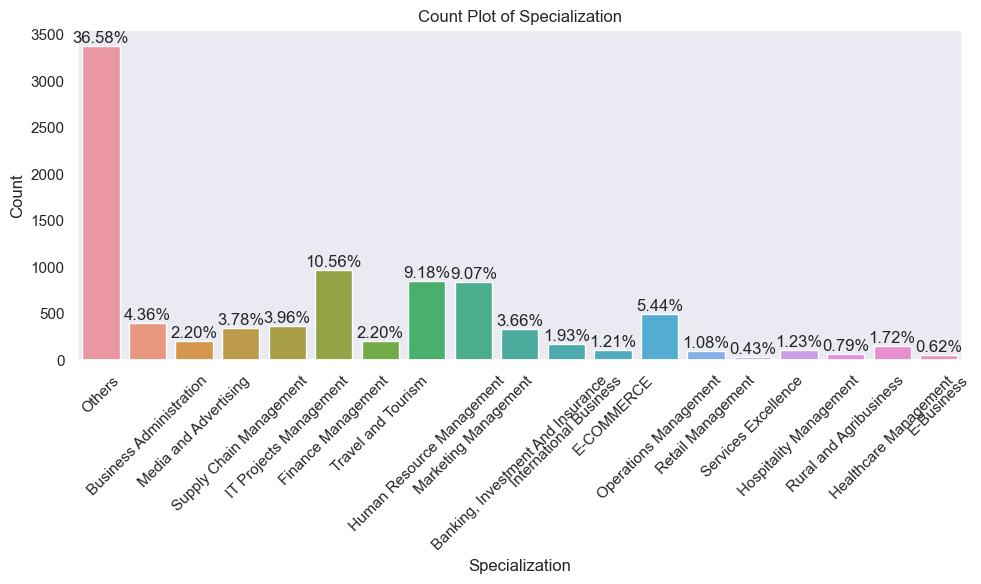

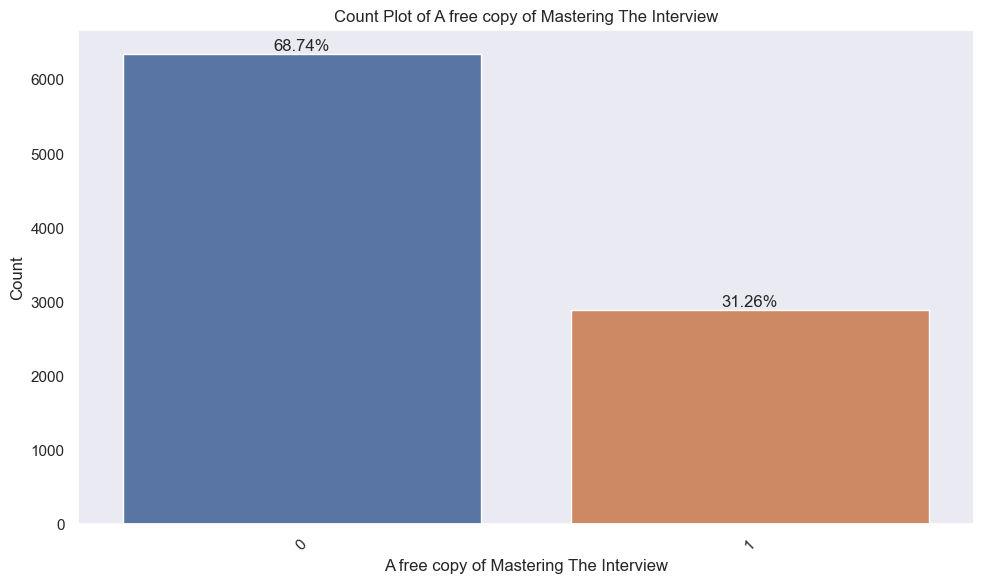

In [318]:
# List of columns for which to create count plots
cols = [
    'Lead Origin', 'Lead Source', 'Last Activity',
    'What is your current occupation', 'Do Not Email',
    'Converted', 'Specialization',
    'A free copy of Mastering The Interview'
]


sns.set_theme(style="dark")


for col in cols:
    plt.figure(figsize=(10, 6))
    
    # Create a count plot
    sns.countplot(data=leads_df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Calculate and display percentages on top of the bars
    total_counts = leads_df[col].value_counts()
    for patch in plt.gca().patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        percentage = y / len(leads_df)  # Calculate percentage based on the total number of entries
        plt.annotate(f'{percentage:.2%}', (x, y), ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()






<strong><span style="color:blue">Observation:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 
- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined
- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities
- **Current_occupation:** It has 90% of the customers as Unemployed
- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.


#### Bivariate Analysis

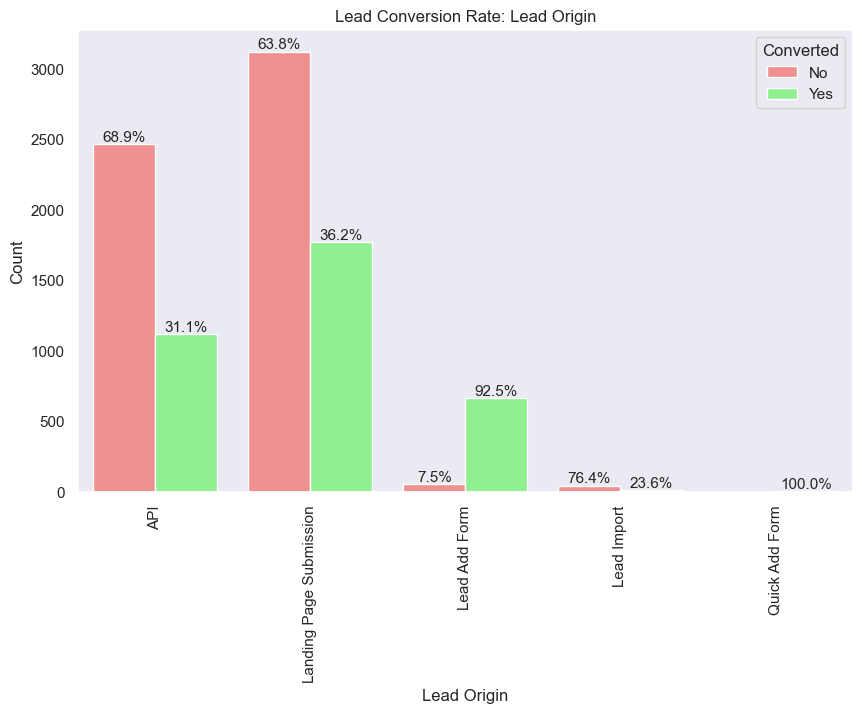

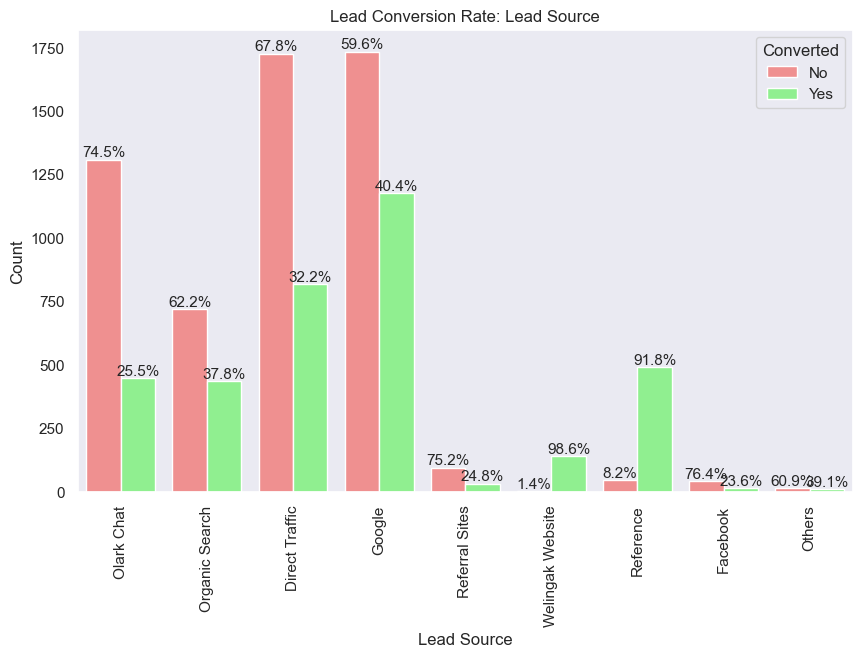

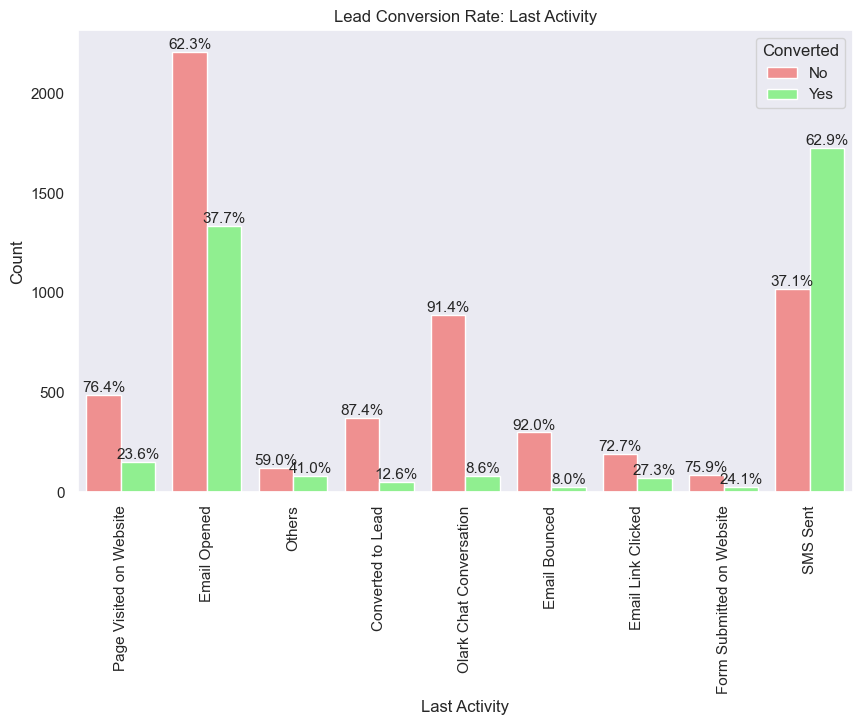

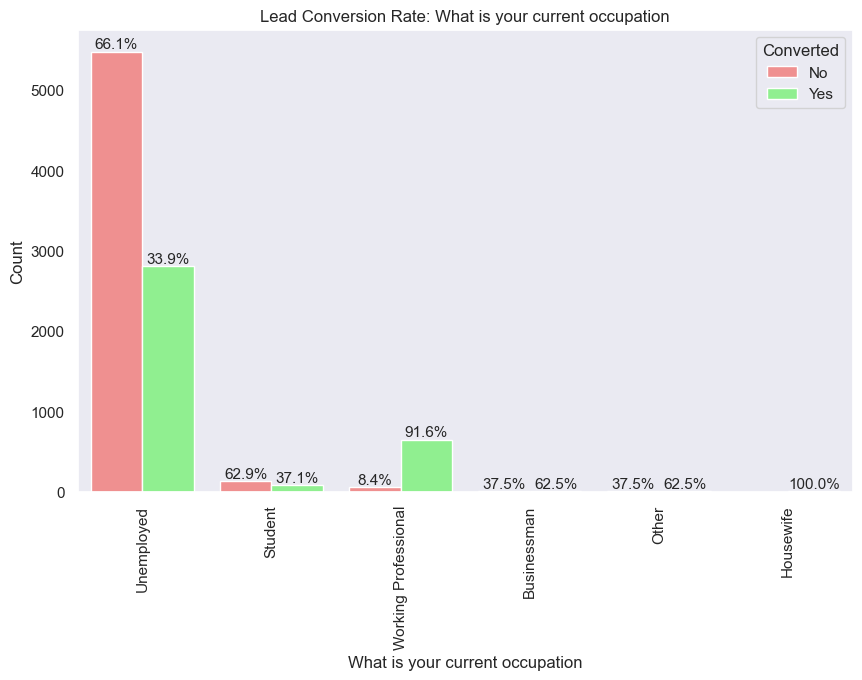

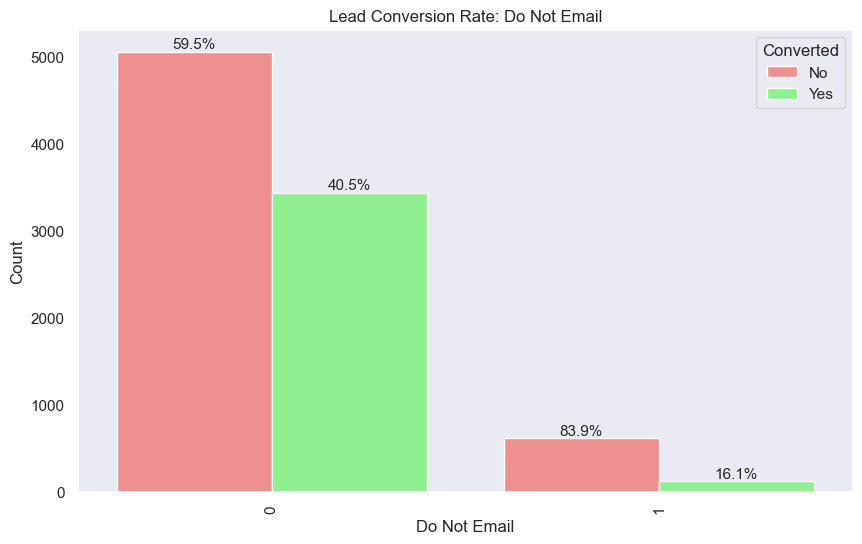

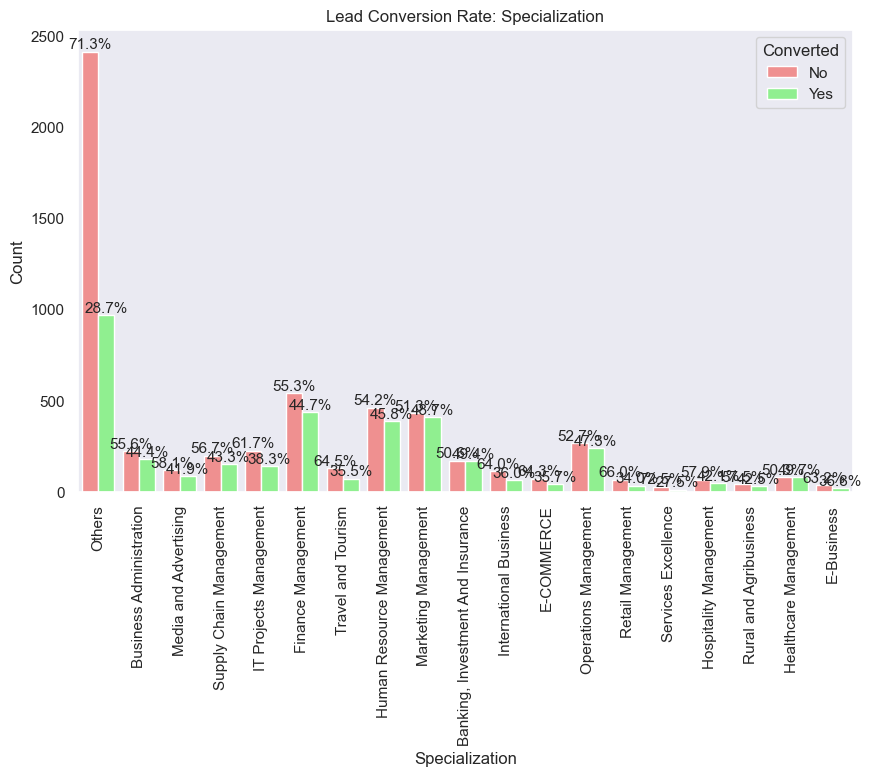

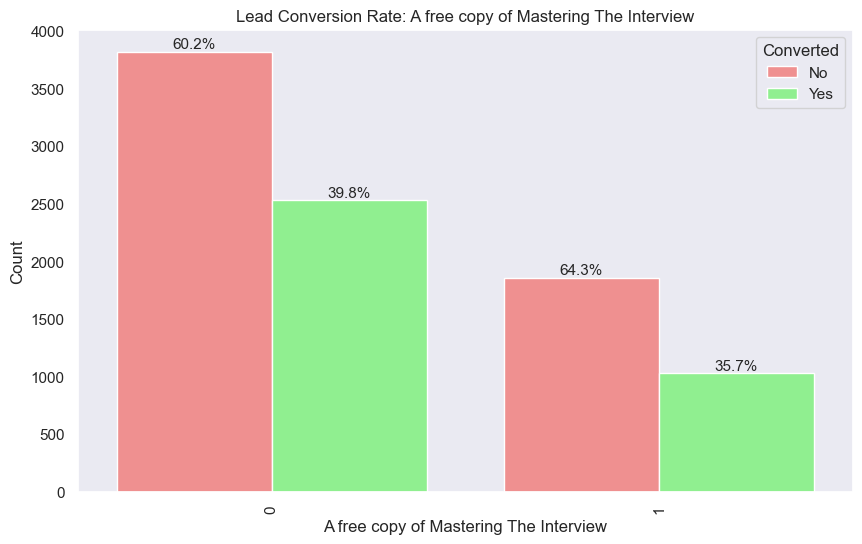

In [319]:
def plot_bivariate_count(data, x_col, y_col):
    # Create a cross-tabulation (crosstab) of the two columns
    crosstab = pd.crosstab(data[x_col], data[y_col], normalize='index') * 100
    count_crosstab = pd.crosstab(data[x_col], data[y_col])

    plt.figure(figsize=(10, 6))
    
    # Define a custom color palette for the count plot bars
    custom_palette = sns.color_palette(['#FF8080', '#80FF80'])

    
    ax = sns.countplot(data=data, x=x_col, hue=y_col, palette=custom_palette)
    plt.title(f'Lead Conversion Rate: {x_col}')
    plt.xlabel(x_col)
    plt.ylabel('Count')
    
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.legend(title=y_col, loc='upper right', labels=['No', 'Yes'])  # Place legend at top right
    
    # Add percentage labels on top of the bars
    all_heights = [[p.get_height() if not pd.isna(p.get_height()) else 0 for p in bars] for bars in ax.containers]

    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

    plt.show()

cols = [
    'Lead Origin', 'Lead Source', 'Last Activity',
    'What is your current occupation', 'Do Not Email', 'Specialization',
    'A free copy of Mastering The Interview'
]

for col in cols:
    plot_bivariate_count(leads_df, col, 'Converted')

<strong><span style="color:blue">Observation:</span></strong>  

**Lead Origin:**
- About 53% of leads stem from "Landing Page Submission," boasting a conversion rate of 36%.
- The "API" accounts for approximately 39% of customers, showing a conversion rate of 31%.

**Current Occupation:**
- Approximately 90% of customers fall under the "Unemployed" category, with a conversion rate of 34%.
- Despite constituting only 7.6% of the total customer base, "Working Professionals" exhibit an impressive 92% conversion rate.

**Do Not Email:**
- A significant 92% of individuals have chosen not to receive email communications regarding the course.

**Lead Source:**
- "Google" yields a conversion rate of 40% among the 31% of customers from this source.
- "Direct Traffic" contributes a lower conversion rate of 32% with a customer percentage of 27%.
- Although "Organic Search" contributes to 37.8% of the conversion rate, it represents only 12.5% of the customer base.
- "Reference" showcases a remarkable conversion rate of 91%, yet it comprises merely around 6% of the customer acquisition.

**Last Activity:**
- The act of sending an "SMS" displays a notably high conversion rate of 63%, driven by 30% of last activities.
- "Email Opened" encompasses 38% of the customer's recent interactions, accompanied by a conversion rate of 37%.

**Specialization:**
- "Marketing Management," "HR Management," and "Finance Management" emerge as prominent contributors.


<Figure size 2000x1500 with 0 Axes>

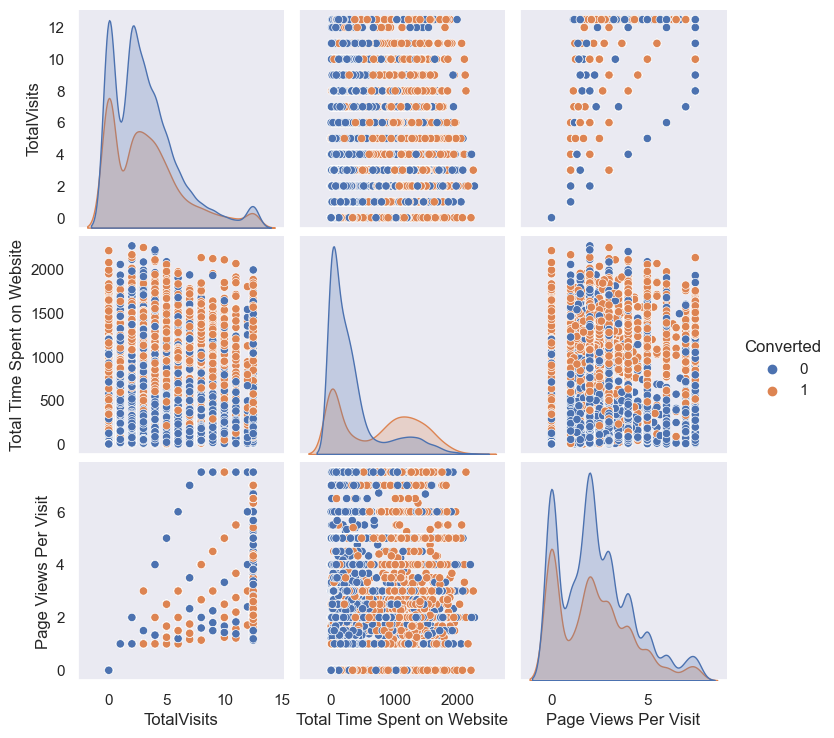

In [320]:
num_cols = [ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(20,15))
sns.pairplot(data=leads_df, vars=num_cols, hue="Converted")
plt.show()

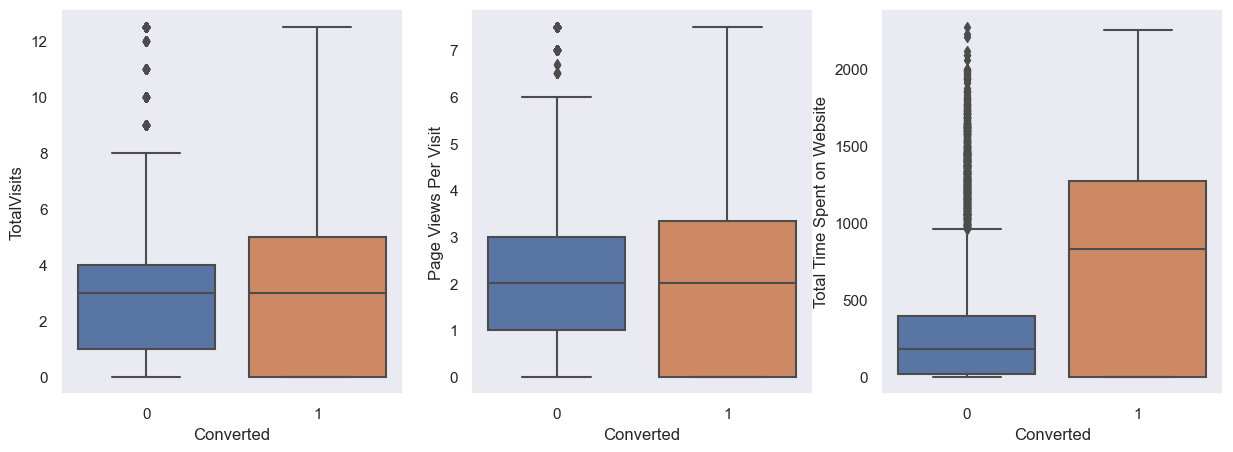

In [321]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

<strong><span style="color:blue">Observation:</span></strong>
#### Leads who spent more time on the website had high conversion rate

## <p id="5">5. Data Preparation</p>

In [322]:
leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

#### Before creating dummy variables lets shorten the columns with large names

In [323]:
# rename 'A free copy of Mastering The Interview' column to 'free_copy' and 'What is your current occupation' to 'occupation'
leads_df.rename(columns={'A free copy of Mastering The Interview':'Free_copy','What is your current occupation':'Occupation'},inplace=True)

In [324]:
# create dummy variables for categorical variables
leads_df = pd.get_dummies(data=leads_df, columns=["Lead Source", "Lead Origin","Last Activity","Specialization","Occupation"], drop_first=True)


In [325]:
leads_df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  Free_copy  Lead Source_Facebook  Lead Source_Google  \
0                   0.0          0                     0                   0   
1                   2.5          0                     0                   0   
2                   2.0          1                     0                   0   
3                   1.0          0                     0                   0   
4                   1.0          0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  ...  \
0                       1                           0  ...   
1                       0                           1  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Occupation_Housewife  Occupation_Other  \
0                                  0                     0                 0   
1                                  0                     0                 0   
2                                  0                     0                 0   
3                                  0                     0                 0   
4                                  0                     0                 0   

   Occupation_Student  Occupation_Unemployed  Occupation_Working Professional  
0                   0                      1                                0  
1                   0                      1                                0  
2                   1                      0                                0  
3                   0                      1                                0  
4                   0                      1                                0  

[5 rows x 49 columns]

In [326]:
leads_df.shape

(9240, 49)

In [327]:
# Lead Conversion Rate
LCR = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
LCR

38.53896103896104

## <p id="6">6. Test-Train Split</p>

In [328]:
# 'Converted' is the dependent variable
y = leads_df.pop('Converted')

# All remaining variable are independent variables
X = leads_df

print('Before split:',X.shape, y.shape)

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print('After split X data', X_train.shape, X_test.shape)
print('After split y data', y_train.shape, y_test.shape)

Before split: (9240, 48) (9240,)
After split X data (6468, 48) (2772, 48)
After split y data (6468,) (2772,)


## <p id="7">7. Feature Scaling</p>

In [329]:
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [330]:
X_train[num_cols].describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count   6468.000000  6468.000000                  6468.000000   
mean       0.078386     0.256747                     0.212974   
std        0.268799     0.241102                     0.240566   
min        0.000000     0.000000                     0.000000   
25%        0.000000     0.000000                     0.005282   
50%        0.000000     0.240000                     0.108275   
75%        0.000000     0.400000                     0.407790   
max        1.000000     1.000000                     1.000000   

       Page Views Per Visit    Free_copy  
count           6468.000000  6468.000000  
mean               0.301820     0.311843  
std                0.254744     0.463282  
min                0.000000     0.000000  
25%                0.000000     0.000000  
50%                0.266667     0.000000  
75%                0.400000     1.000000  
max                1.000000     1.000000

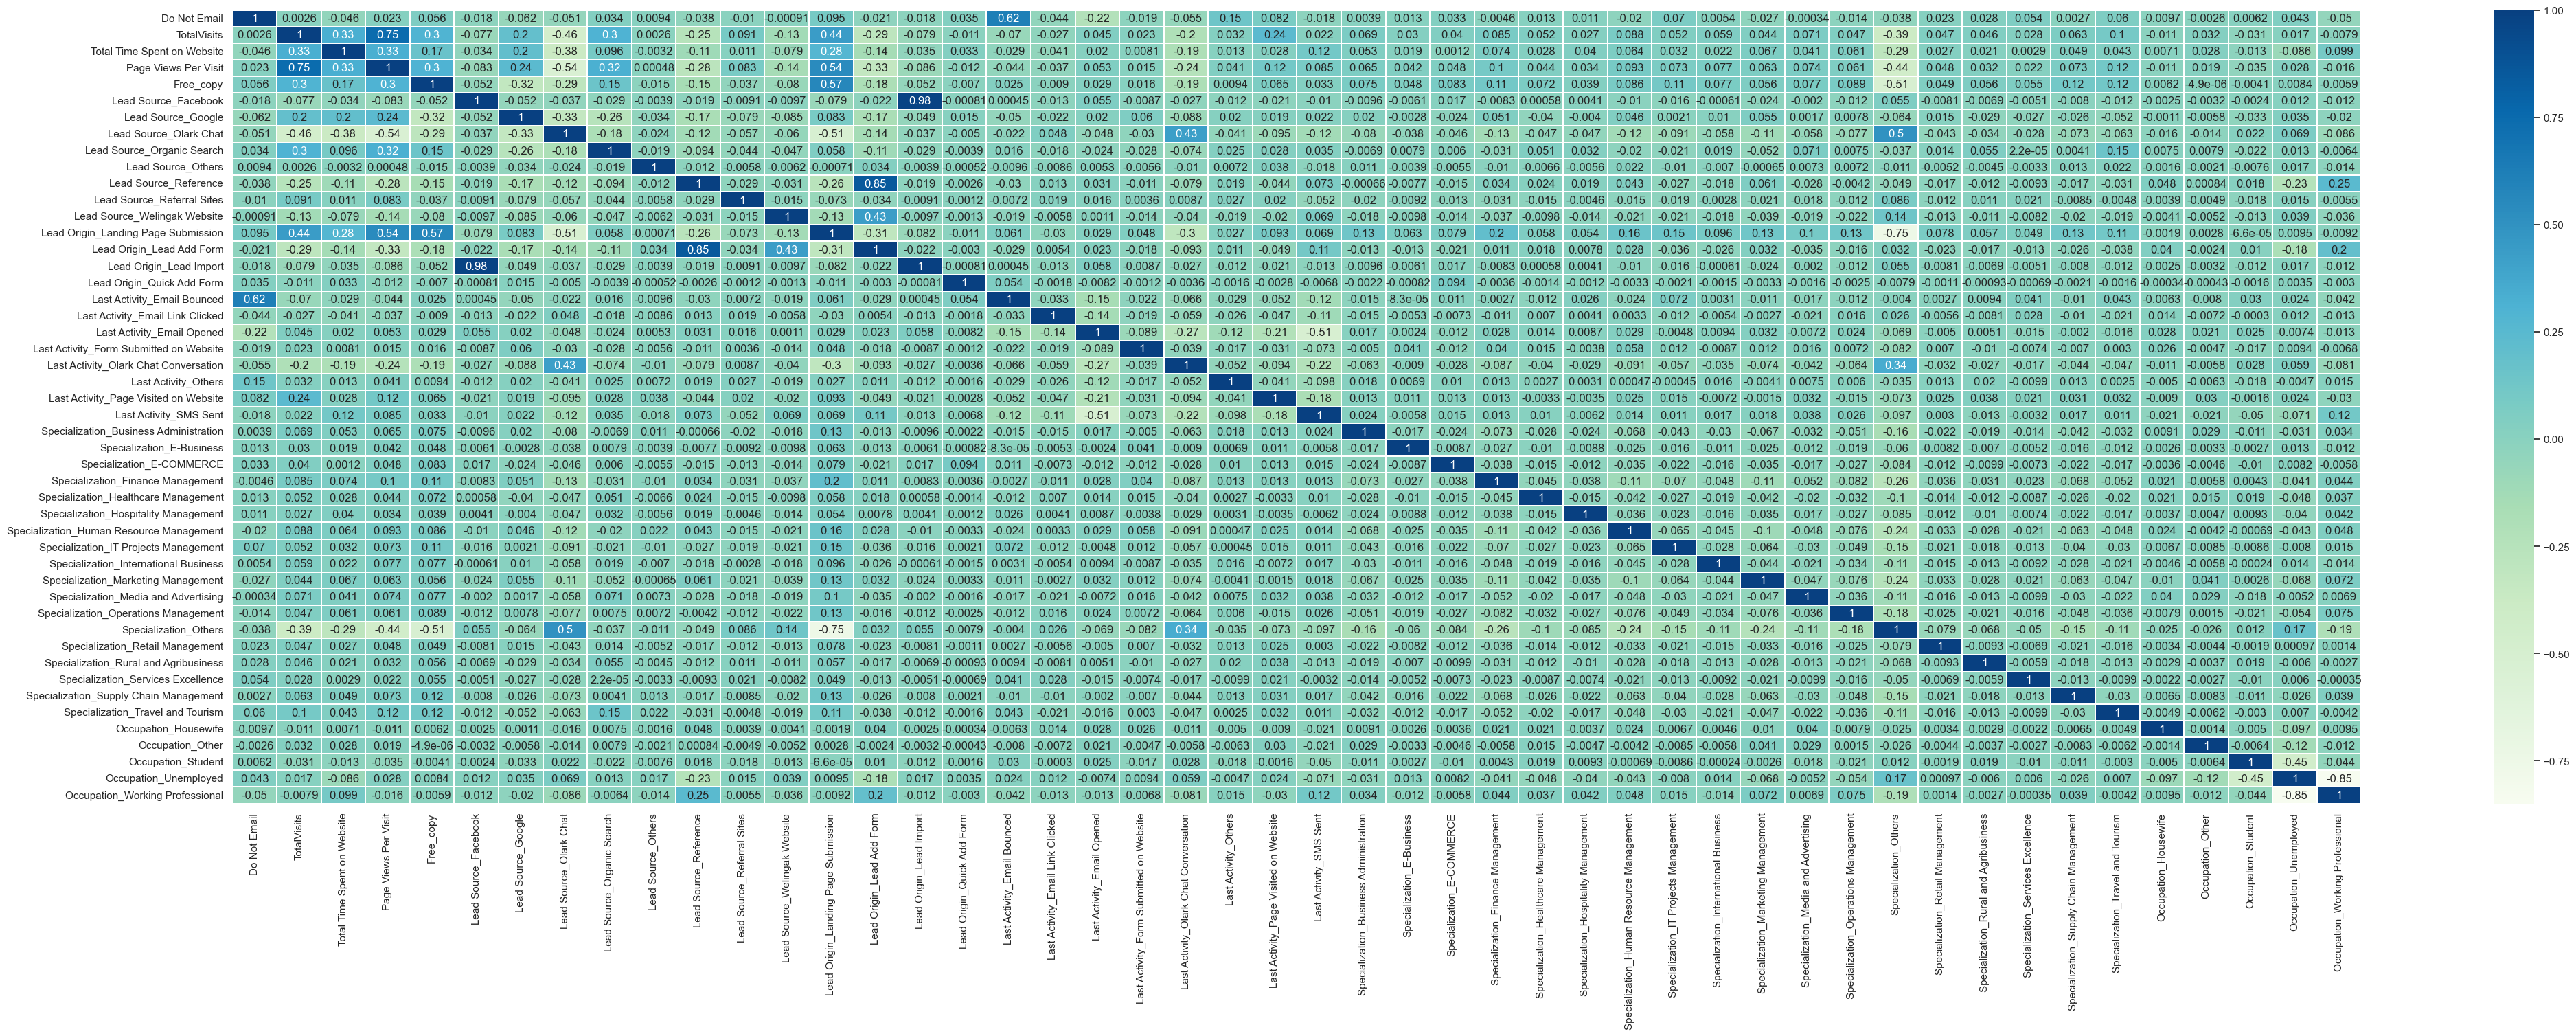

In [331]:
# analyse correlation matrix
plt.figure(figsize = (50,15))        
sns.heatmap(leads_df.corr(),linewidths=0.01,cmap="GnBu",annot=True)
plt.show()

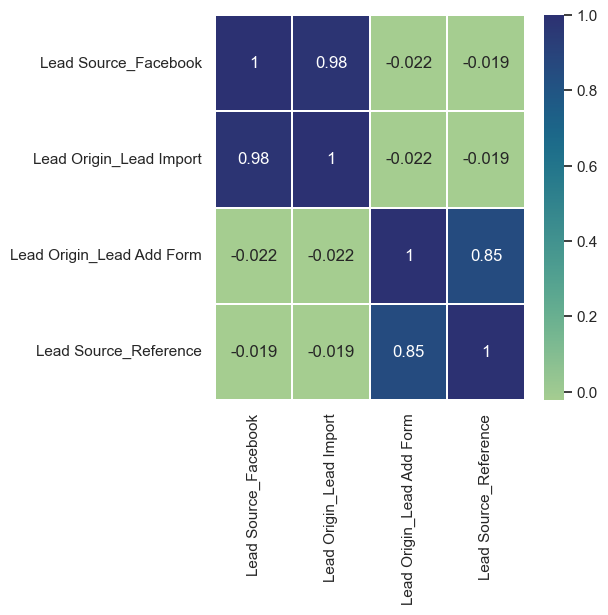

In [332]:
plt.figure(figsize = (5,5))        
sns.heatmap(leads_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="crest",annot=True)
plt.show()

<strong><span style="color:blue">Observation:</span></strong>
These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.

In [333]:
# drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' columns as they are highly correlated with 'Lead Source_Facebook' and 'Lead Source_Reference' respectively
X_train.drop(['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form'], axis=1, inplace=True)
X_test.drop(['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form'], axis=1, inplace=True)

## <p id="8">8. Feature Selection</p>

In [334]:
len(X_train.columns)

46

##### Using automated approach to cut down the features
Feature ranking with recursive feature elimination(RFE).

In [335]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [336]:
# all columns
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Free_copy', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Quick Add Form', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Hum

In [337]:
# 15 features selected by RFE
rfe_cols = X_train.columns[rfe.support_].values.tolist()
print(rfe_cols)
print(X_train.columns[rfe.support_])

['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management', 'Specialization_Others', 'Occupation_Housewife', 'Occupation_Working Professional']
Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Origin_Landing Page Submission',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Occupation_Housewife',
       'Occupation_Working Professional'],
      dtype='object')


In [338]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['Free_copy', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Origin_Quick Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       '

##### Manual Elimination

In [339]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()  
    print(lm.summary())
    return lm

In [340]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## <p id="9">9. Model Building</p>

Model Evaluation criteria
- p-value < 0.05
- VIF < 5

#### Model-1

In [341]:
#Selected columns for Model 1 - all columns selected by RFE
build_model(rfe_cols)
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.8
Date:                Tue, 15 Aug 2023   Deviance:                       5423.6
Time:                        16:31:30   Pearson chi2:                 8.03e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3879
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE : </span></strong> "Occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

In [342]:
def remove_and_return_element(arr, element):
    updated_array = [x for x in arr if x != element]
    return updated_array

In [343]:
rfe_cols = remove_and_return_element(rfe_cols, 'Occupation_Housewife')

#### Model-2

In [344]:
build_model(rfe_cols)
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.3
Date:                Tue, 15 Aug 2023   Deviance:                       5438.6
Time:                        16:31:31   Pearson chi2:                 8.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3865
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong> "Lead Source_Others" column will be removed from model due to high p-value of 0.095,  which is above the accepted threshold of 0.05 for statistical significance.

In [345]:
rfe_cols = remove_and_return_element(rfe_cols, 'Lead Source_Others')

#### Model-3

In [346]:
build_model(rfe_cols)
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.6
Date:                Tue, 15 Aug 2023   Deviance:                       5441.3
Time:                        16:31:31   Pearson chi2:                 8.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3862
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong> "Page Views Per Visit" column will be removed from model due to high VIF value of 6.34, which is greater than the accepted threshold of 5

In [347]:
rfe_cols = remove_and_return_element(rfe_cols, 'Page Views Per Visit')

#### Model-4

In [348]:
build_model(rfe_cols)
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2751.3
Date:                Tue, 15 Aug 2023   Deviance:                       5502.5
Time:                        16:31:31   Pearson chi2:                 7.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong> "TotalVisits" column will be removed from model due to high p-value of 0.086, which is above the accepted threshold of 0.05 for statistical significance.

In [349]:
rfe_cols = remove_and_return_element(rfe_cols, 'TotalVisits')

#### Model-5

In [350]:
logm = build_model(rfe_cols)
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2752.7
Date:                Tue, 15 Aug 2023   Deviance:                       5505.4
Time:                        16:31:31   Pearson chi2:                 7.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3801
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong> No variable needs to be dropped as they all have significant p-values within the threshold (p-values < 0.05) and all have good VIF values less than 5.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 5 for `Model Evaluation`.

## <p id="10">10. Model Evaluation</p>

In [351]:
X_train_sm5 = sm.add_constant(X_train[rfe_cols])

# Getting the predicted values on the train set
y_train_pred = logm.predict(X_train_sm5)         # giving prob. of getting 1

y_train_pred[:10]

1871    0.353673
6795    0.079336
3516    0.166617
8105    0.767183
3934    0.142499
4844    0.986825
3297    0.123374
8071    0.996913
987     0.214811
7423    0.889707
dtype: float64

In [352]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35367253, 0.07933555, 0.16661739, 0.76718325, 0.14249922,
       0.98682495, 0.12337446, 0.99691315, 0.21481085, 0.8897068 ])

In [353]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.353673         1871
1          0        0.079336         6795
2          0        0.166617         3516
3          0        0.767183         8105
4          0        0.142499         3934

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0


In [354]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.353673         1871          0
1          0        0.079336         6795          0
2          0        0.166617         3516          0
3          0        0.767183         8105          1
4          0        0.142499         3934          0

#### Confusion matrix 


In [355]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])

print(confusion)

[[3572  430]
 [ 844 1622]]


In [356]:
# Predicted     not_converted    converted
# Actual
# not_converted        3572      430
# converted            844       1622  

#### Accuracy

In [357]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.803030303030303


#### Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [358]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [359]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6577453365774534


In [360]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.8925537231384307


In [361]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10744627686156921


In [362]:
# positive predictive value 
print (TP / float(TP+FP))

0.7904483430799221


In [363]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8088768115942029


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [364]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [365]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

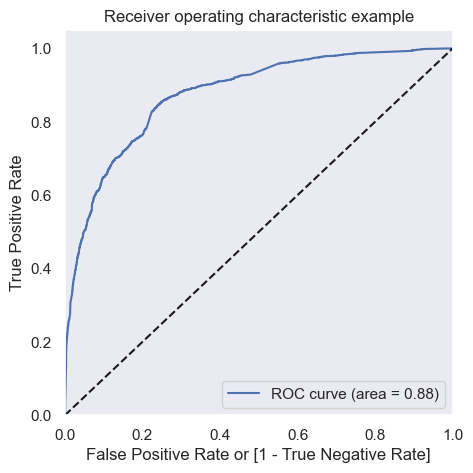

In [366]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [367]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.353673         1871          0    1    1    1    1    0   
1          0        0.079336         6795          0    1    0    0    0    0   
2          0        0.166617         3516          0    1    1    0    0    0   
3          0        0.767183         8105          1    1    1    1    1    1   
4          0        0.142499         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [368]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.582406  0.977291  0.339080
0.2   0.2  0.745826  0.897405  0.652424
0.3   0.3  0.787570  0.860503  0.742629
0.4   0.4  0.797928  0.727494  0.841329
0.5   0.5  0.803030  0.657745  0.892554
0.6   0.6  0.799165  0.594891  0.925037
0.7   0.7  0.779066  0.505272  0.947776
0.8   0.8  0.755102  0.403082  0.972014
0.9   0.9  0.707174  0.245742  0.991504


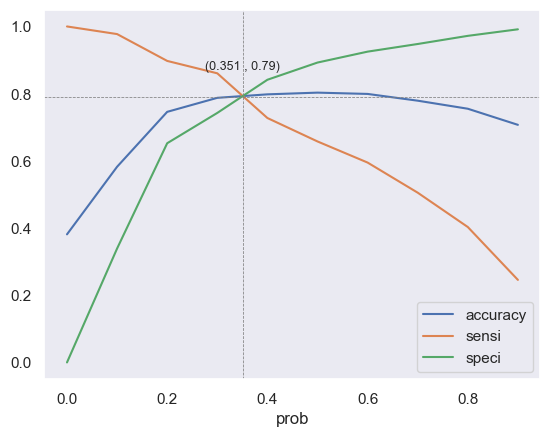

In [369]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.351 is the approx. point where all the curves meet, so 0.351 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [370]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.351 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.353673         1871                1
1          0        0.079336         6795                0
2          0        0.166617         3516                0
3          0        0.767183         8105                1
4          0        0.142499         3934                0

#### Calculating all metrics using confusion matrix for Train

In [371]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.7878787878787878


In [372]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [373]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3174  828]
 [ 544 1922]] 

************************************************** 

True Negative                    :  3174
True Positive                    :  1922
False Negative                   :  544
False Positve                    :  828
Model Accuracy                   :  0.7879
Model Sensitivity                :  0.7794
Model Specificity                :  0.7931
Model Precision                  :  0.6989
Model Recall                     :  0.7794
Model True Positive Rate (TPR)   :  0.7794
Model False Positive Rate (FPR)  :  0.2069


************************************************** 



#### Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [374]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

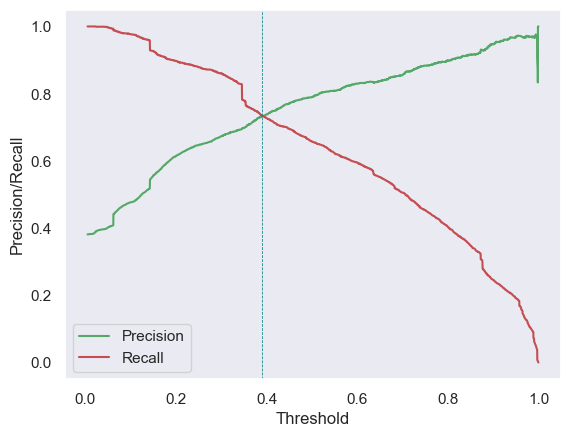

In [375]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.39, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.39 approx from above curve.

In [376]:
# copying df to test model evaluation with precision recall threshold of 0.39
y_train_precision_recall = y_train_pred_final.copy()

In [377]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.39 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.353673         1871                1   
1          0        0.079336         6795                0   
2          0        0.166617         3516                0   
3          0        0.767183         8105                1   
4          0        0.142499         3934                0   

   precision_recall_prediction  
0                            0  
1                            0  
2                            0  
3                            1  
4                            0

In [378]:
## Lets see all metrics at 0.39 cutoff in precision-recall view and compare it with 0.351 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3341  661]
 [ 656 1810]] 

************************************************** 

True Negative                    :  3341
True Positive                    :  1810
False Negative                   :  656
False Positve                    :  661
Model Accuracy                   :  0.7964
Model Sensitivity                :  0.734
Model Specificity                :  0.8348
Model Precision                  :  0.7325
Model Recall                     :  0.734
Model True Positive Rate (TPR)   :  0.734
Model False Positive Rate (FPR)  :  0.1652


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> 
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.39 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 73%, but we need it close to 80% as the Business Objective.
- We are getting metric values close to 80% with the sensitivity-specificity cut-off threshold of 0.351. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.


### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [379]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.353673         1871                1          35
1          0        0.079336         6795                0           8
2          0        0.166617         3516                0          17
3          0        0.767183         8105                1          77
4          0        0.142499         3934                0          14

## <p id="11">11. Predictions on Test Set</p>

#### Scaling Test dataset

In [380]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_cols]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Source_Reference  \
4269           0.0                     0.444982                      0   
2376           0.0                     0.000000                      1   
7766           0.0                     0.025968                      0   
9199           0.0                     0.000000                      0   
4359           0.0                     0.000000                      1   

      Lead Source_Welingak Website  Lead Origin_Landing Page Submission  \
4269                             0                                    0   
2376                             0                                    0   
7766                             0                                    0   
9199                             0                                    0   
4359                             0                                    0   

      Last Activity_Email Opened  Last Activity_Others  \
4269                           0                     0   
2376                           0                     0   
7766                           0                     1   
9199                           0                     0   
4359                           1                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Occupation_Working Professional  
4269                      1                                0  
2376                      1                                0  
7766                      0                                1  
9199                      1                                0  
4359                      0                                0

#### Prediction on Test Dataset using final model 

In [381]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 12)

In [382]:
# making prediction using model 6 (final model)
y_test_pred = logm.predict(X_test_sm)

In [383]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.754899
2376  0.872113
7766  0.938619
9199  0.061934
4359  0.876033

In [384]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [385]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.754899
1          1         2376  0.872113
2          1         7766  0.938619
3          0         9199  0.061934
4          1         4359  0.876033

In [386]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.754899
1         2376          1        0.872113
2         7766          1        0.938619
3         9199          0        0.061934
4         4359          1        0.876033

In [387]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.351 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.754899                1
1         2376          1        0.872113                1
2         7766          1        0.938619                1
3         9199          0        0.061934                0
4         4359          1        0.876033                1

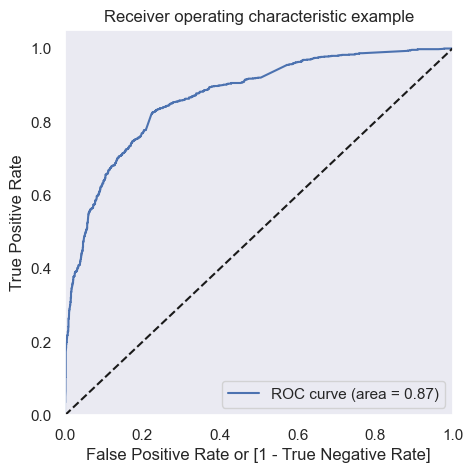

In [388]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

<strong><span style="color:Blue">NOTE:</span></strong> 
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

#### Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [389]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1340  337]
 [ 253  842]] 

************************************************** 

True Negative                    :  1340
True Positive                    :  842
False Negative                   :  253
False Positve                    :  337
Model Accuracy                   :  0.7872
Model Sensitivity                :  0.7689
Model Specificity                :  0.799
Model Precision                  :  0.7142
Model Recall                     :  0.7689
Model True Positive Rate (TPR)   :  0.7689
Model False Positive Rate (FPR)  :  0.201


************************************************** 



In [390]:
# features and their coefficicent from final model
parameters=logm.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website             5.094722
Total Time Spent on Website              3.962985
Occupation_Working Professional          2.649252
Lead Source_Reference                    2.558319
Last Activity_SMS Sent                   2.079201
Last Activity_Others                     1.501143
Last Activity_Email Opened               0.923062
Do Not Email                            -1.043936
Specialization_Hospitality Management   -1.052109
Specialization_Others                   -1.191751
Lead Origin_Landing Page Submission     -1.506184
const                                   -1.525997
dtype: float64

## <strong><span style="color:purple"> Adding `Lead Score` Feature to Test dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [391]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.754899                1          75
1         2376          1        0.872113                1          87
2         7766          1        0.938619                1          94
3         9199          0        0.061934                0           6
4         4359          1        0.876033                1          88

<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

## <p id="12">12. Conclusion</p>

## 📌 Train - Test
### <strong><span style="color:purple">Train Data Set:</span></strong>   

- <strong><span style="color:Green">Accuracy:</span></strong> 78.79%

- <strong><span style="color:Green">Sensitivity:</span></strong> 77.9%

- <strong><span style="color:Green">Specificity:</span></strong> 79.31%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 78.72%

- <strong><span style="color:Green">Sensitivity:</span></strong> 76.89%

- <strong><span style="color:Green">Specificity:</span></strong> 79.99%
 

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation metrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 77.9%` in the train set and 76.89% in the test set, using a cut-off value of 0.351.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 78%, which is in line with the study's objectives.
<hr/>



## 📌Model parameters
- The final Logistic Regression Model has 11 features

### <strong><span >`Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:Green">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:Green">Total Time Spent on Website</span></strong> 

- <strong><span style="color:Green">Occupation_Working Professional</span></strong> 

<strong><span style="color:Blue">NOTE: </span></strong> The Optimal cutoff probability point is 0.351.Converted probability greater than 0.351 will be predicted as Converted lead (Hot lead) & probability smaller than 0.351 will be predicted as not Converted lead (Cold lead).
<hr/>

# <strong><span style="color:blue">Business Recommendations </span></strong> 

### <strong><span >To increase our Lead Conversion Rates: </span></strong>  

1. Give priority to attributes exhibiting positive coefficients to enhance precision in targeted marketing strategies.
2. Formulate tactics aimed at drawing in high-caliber leads from top-performing sources.
3. Tailor messages to effectively connect with employed experts.
4. Fine-tune communication channels based on the impact of lead engagement.
5. Consider allocating a larger budget for various activities, including advertising, on the Welingak Website.
6. Introduce incentives or discounts for submitting references that successfully translate into leads, thereby fostering the submission of additional references.
7. Implement an assertive approach in targeting working professionals due to their elevated conversion rates and improved financial capabilities to afford higher fees as well. 


### <strong><span>To identify areas of improvement: </span></strong>  

1. Evaluate specialization offerings with negative coefficients.
2. Assess the landing page submission process for potential enhancements.



